# Model Task Types - Random Forest Regression

> Objectives:
>
> - Learn how to implement **Random Forest Regression** for predicting numerical targets.
> - Use the **Bike Sharing Dataset**, which contains data about bike rental demand based on environmental and seasonal features.
> - Build, train, and evaluate a Random Forest Regression model.
> - Analyze feature importance and evaluate model performance using metrics and visualization.

### Man Goal
The objective is to use a Random Forest Regression model to predict the number of bike rentals (the `cnt` column) based on these features. <br />
This is a regression problem, where the target variable `cnt` is a continuous numeric value representing the number of bikes rented.

### Imports

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Dataset: Bike Sharing Dataset

#### Source:
The data set is already in the `bike-sharing-dataset` folder. It was downloaded from the **UCI Machine Learning Repository**:  
[https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).
We will Use the `hour.csv` file for this exercise.

#### Features:
- **Seasonal Information**: Season, year, month, and day of the week.
- **Environmental Conditions**: Temperature, humidity, and wind speed.
- **Target**: The total number of bike rentals for a given hour (`count`).

### Step 1: Load the Dataset

In [51]:
file_path = "./bike-sharing-dataset/hour.csv"
df = pd.read_csv(file_path)

# Display sample data
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Step 2: Preprocess the Data

- Drop irrelevant columns (e.g., instant, casual, registered).
- Convert categorical variables like season and weathersit into one-hot encoded features.

TODO: Explain about one-hot encoding

In [52]:

# Drop irrelevant columns for this exercise
df = df.drop(["dteday", "instant", "casual", "registered"], axis=1)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["season", "weathersit"], drop_first=True)

# Split features and target
X = df.drop(["cnt"], axis=1)
y = df["cnt"]

TODO: Add note about error when re-runing the cell

### Step 3: Split the Dataset

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### Step 4: Transform String Data

Explain that we dropped dteday and how here we only check for numerical ones

In [54]:
# Ensure all remaining features are numeric
X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

### Step 5: Train the Model

In [55]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Step 6: Get the Predictions

In [56]:
y_pred = rf.predict(X_test)

### Step 7: Evaluate the Model

In [57]:
# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error: 2033.30
R-Squared: 0.94


TODO: Add explanation about the meaning of these metrics

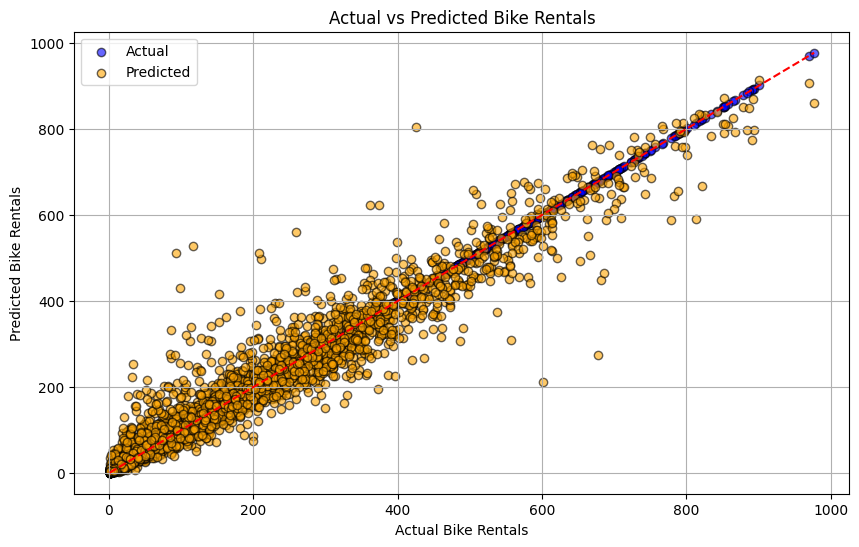

In [58]:
# Predict the number of bike rentals on the test set
y_pred = rf.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Plotting the comparison
plt.figure(figsize=(10, 6))

# Plot actual vs predicted with different colors
plt.scatter(comparison_df["Actual"], comparison_df["Actual"],
            color='blue', label='Actual', alpha=0.6, edgecolors='k')
plt.scatter(comparison_df["Actual"], comparison_df["Predicted"],
            color='orange', label='Predicted', alpha=0.6, edgecolors='k')

# Plot a line for perfect predictions (y = x)
plt.plot([comparison_df["Actual"].min(), comparison_df["Actual"].max()],
         [comparison_df["Actual"].min(), comparison_df["Actual"].max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Bike Rentals")
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.legend()
plt.grid(True)
plt.show()

### Step 8: Analyze Feature Importance

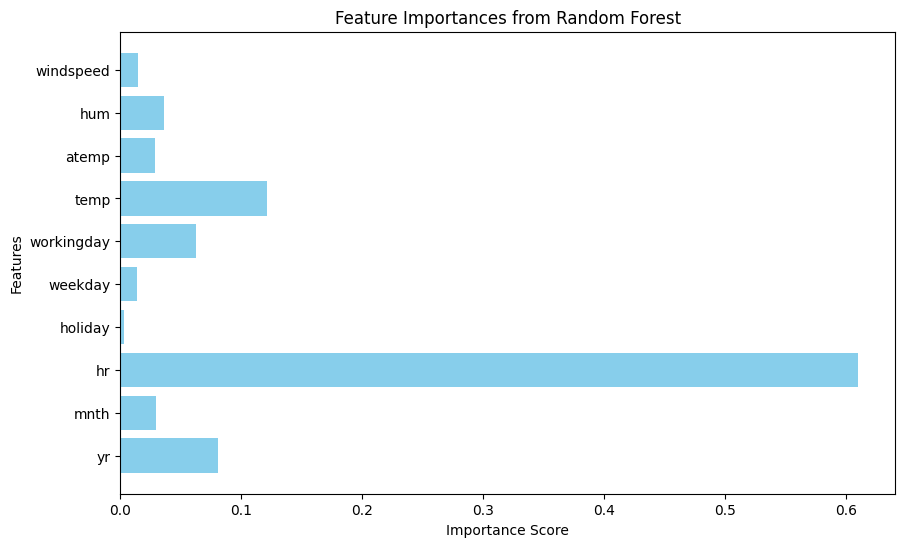

In [59]:
# Get the feature importances from the trained model
importances = rf.feature_importances_

# Ensure features match the trained dataset
features = X_train.columns  # Use the columns from X_train used during training

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()